In [1]:
import sys
sys.path.append('../')

from s1_lia.app import get_opera_lia

In [2]:
wkt = 'POLYGON((-107.5 37.6,-107.5 38.0,-108.0 38.0,-108.0 37.6,-107.5 37.6))'
orbit = 129
stem = 'testing'
dir = '/Users/zmhoppinen/Documents/s1_lia/local'

In [3]:
get_opera_lia(wkt, dir, orbit, stem)

INFO:s1_lia.app:Starting OPERA LIA workflow
INFO:s1_lia.search:ASF search attempt 1/20 for AOI and relative orbit [129]
INFO:asf_search:SEARCH: Using search opts {
    "intersectsWith": "POLYGON ((-107.5000000000000000 37.6000000000000014, -107.5000000000000000 38.0000000000000000, -108.0000000000000000 38.0000000000000000, -108.0000000000000000 37.6000000000000014, -107.5000000000000000 37.6000000000000014))",
    "platform": [
        "SENTINEL-1A",
        "SENTINEL-1C",
        "SENTINEL-1B"
    ],
    "processingLevel": [
        "RTC-STATIC"
    ],
    "relativeOrbit": [
        129
    ],
    "dataset": [
        "OPERA-S1"
    ]
}
INFO:asf_search:SEARCH: Using cmr endpoint: "https://cmr.earthdata.nasa.gov/search/granules.umm_json"
INFO:asf_search:SUBQUERY 1: Beginning subquery with opts: {
    "intersectsWith": "POLYGON ((-107.5000000000000000 37.6000000000000014, -107.5000000000000000 38.0000000000000000, -108.0000000000000000 38.0000000000000000, -108.0000000000000000 37.6000

[PosixPath('/Users/zmhoppinen/Documents/s1_lia/local/testing_129_inc.tif')]

In [ ]:
import s1_lia

# Define AOI as WKT polygon string
aoi_wkt = 'POLYGON((-107.5 37.6,-107.5 38.0,-108.0 38.0,-108.0 37.6,-107.5 37.6))'

# Define directory to store downloaded and merged files
data_dir = "./data"

# Optionally if you know what orbit you are interested in:
orbit = 129

# Run full workflow: search, download, merge
merged_files = s1_lia.get_opera_lia(aoi_wkt, data_dir)

print("Merged incidence angle files:")
for f in merged_files:
    print(f)

INFO:s1_lia.app:Starting OPERA LIA workflow
INFO:s1_lia.search:ASF search attempt 1/20 for AOI and relative orbit None
INFO:root:'type': 'REVERSE': 'report': Reversed polygon winding order
["'type': 'REVERSE': 'report': Reversed polygon winding order"]
INFO:asf_search:SEARCH: Using search opts {
    "intersectsWith": "POLYGON ((-105.0000000000000000 40.0000000000000000, -104.0000000000000000 40.0000000000000000, -104.0000000000000000 41.0000000000000000, -105.0000000000000000 41.0000000000000000, -105.0000000000000000 40.0000000000000000))",
    "platform": [
        "SENTINEL-1A",
        "SENTINEL-1B",
        "SENTINEL-1C"
    ],
    "processingLevel": [
        "RTC-STATIC"
    ],
    "dataset": [
        "OPERA-S1"
    ]
}
INFO:asf_search:SEARCH: Using cmr endpoint: "https://cmr.earthdata.nasa.gov/search/granules.umm_json"
INFO:asf_search:SUBQUERY 1: Beginning subquery with opts: {
    "intersectsWith": "POLYGON ((-105.0000000000000000 40.0000000000000000, -104.0000000000000000 40

Merged incidence angle files:
data/Weld_County_40.5_-104.5_158_inc.tif
data/Weld_County_40.5_-104.5_151_inc.tif
data/Weld_County_40.5_-104.5_078_inc.tif
data/Weld_County_40.5_-104.5_056_inc.tif
data/Weld_County_40.5_-104.5_005_inc.tif


NameError: name 'files' is not defined

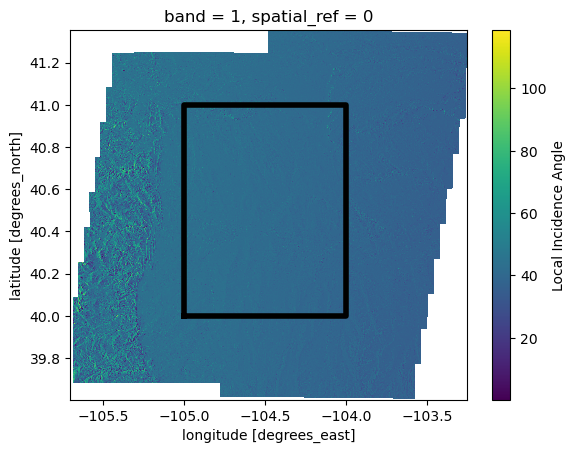

In [3]:
import xarray as xr
import shapely
import matplotlib.pyplot as plt
xr.open_dataarray(merged_files[0]).rio.reproject('EPSG:4326').plot()
x, y = shapely.from_wkt(aoi_wkt).exterior.xy
plt.gca().plot(x,y, color = 'k', linewidth = 4)